# What type of weapons are typically used in mass shootings

In [74]:
#Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress
import holoviews as hv

import warnings
warnings.filterwarnings("ignore")

# Mass Killings Files
mass_kills_df = "./Resources/mass_killing_incidents_public.csv"
mass_weapons_df = "./Resources/mass_killing_weapons_public.csv"

# Load the data to a DataFrame
mass_kills = pd.read_csv(mass_kills_df)
mass_weapons = pd.read_csv(mass_weapons_df)

# Display the DataFrame
#mass_kills.head()
#mass_weapons.head()



In [75]:
#Merge Data
mass_kills_complete = pd.merge(mass_kills, mass_weapons, how="left", 
                               on=["incident_id", "incident_id"])
mass_kills_complete.head()

,incident_id,date,city,state,num_offenders,num_victims_killed,num_victims_injured,firstcod,secondcod,type,situation_type,location_type,location,longitude,latitude,narrative,weapon_id,weapon_type,gun_class,gun_type
0,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,883.0,gun,LG,semiautomatic rifle
1,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,884.0,gun,HG,handgun
2,567,2023-05-02,Lake Wales,FL,1,4,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-81.584680,27.912660,"Al Stenson, 38, fatally shot his girlfriend an...",882.0,gun,UG,NaN
3,565,2023-04-30,Mojave,CA,1,4,0,Shooting,NaN,Unsolved,NaN,Residence/Other shelter,Residence,-118.177390,35.055360,Three women and one man were fatally shot late...,880.0,gun,UG,NaN
4,566,2023-04-30,Henryetta,OK,1,6,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-95.936810,35.439920,"Jesse McFadden fatally shot his wife, her chil...",881.0,gun,HG,semiautomatic handgun


## Type of firearm used in mass shootings 

In [76]:
#Select Columns
weapons_info = mass_kills_complete[["incident_id", "date", "city", "state", 
                                   "num_victims_killed", "location_type", 
                                    "gun_type", "weapon_type"]]
#Rename
weapons_df = weapons_info.copy()

weapons_df.head()

,incident_id,date,city,state,num_victims_killed,location_type,gun_type,weapon_type
0,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,semiautomatic rifle,gun
1,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,handgun,gun
2,567,2023-05-02,Lake Wales,FL,4,Residence/Other shelter,NaN,gun
3,565,2023-04-30,Mojave,CA,4,Residence/Other shelter,NaN,gun
4,566,2023-04-30,Henryetta,OK,6,Residence/Other shelter,semiautomatic handgun,gun


In [77]:
#Rename the columns
weapons_df = weapons_df.rename(columns={
    "incident_id": "ID",
    "date": "Date",
    "city": "City",
    "state": "State",
    "num_victims_killed": "# of Victims",
    "location_type": "Location Type",
    "gun_type": "Gun Type",
    "weapon_type": "Weapon Type",
})

weapons_df.head()

,ID,Date,City,State,# of Victims,Location Type,Gun Type,Weapon Type
0,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,semiautomatic rifle,gun
1,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,handgun,gun
2,567,2023-05-02,Lake Wales,FL,4,Residence/Other shelter,NaN,gun
3,565,2023-04-30,Mojave,CA,4,Residence/Other shelter,NaN,gun
4,566,2023-04-30,Henryetta,OK,6,Residence/Other shelter,semiautomatic handgun,gun


In [78]:
#Cleaned DF

cleaned_weapons_df = weapons_df.dropna()


cleaned_weapons_df.head()

,ID,Date,City,State,# of Victims,Location Type,Gun Type,Weapon Type
0,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,semiautomatic rifle,gun
1,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,handgun,gun
4,566,2023-04-30,Henryetta,OK,6,Residence/Other shelter,semiautomatic handgun,gun
5,564,2023-04-28,Cleveland,TX,5,Residence/Other shelter,semiautomatic rifle,gun
7,562,2023-04-15,Dadeville,AL,4,Commercial/Retail/Entertainment,handgun,gun


## Most commonly used Weapon count

In [79]:
gun_type_count = cleaned_weapons_df["Gun Type"].value_counts()
gun_type_count

handgun                  135
semiautomatic handgun    120
semiautomatic rifle       62
rifle                     61
shotgun                   46
revolver                  34
pistol                    29
Name: Gun Type, dtype: int64

In [80]:
total_gun = gun_type_count.sum()
total_gun

487

## Bar Chart for Weapons

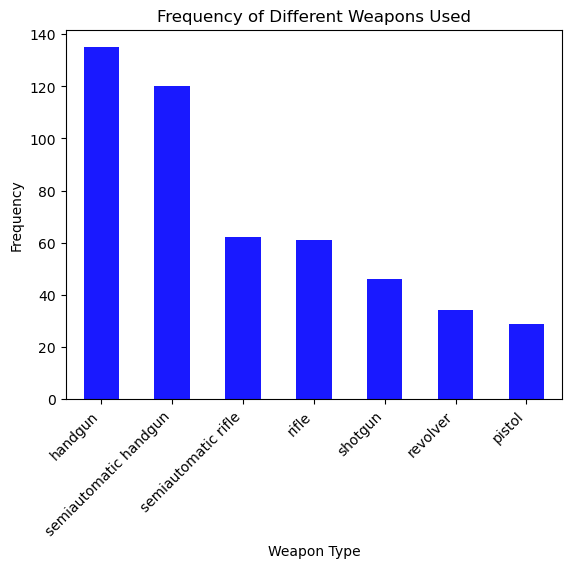

<Figure size 640x480 with 0 Axes>

In [83]:
#Create a bar chart for the weapons used

#Frequency calculation
weapons_count = cleaned_weapons_df["Gun Type"].value_counts()

#Bar chart
weapons_count.plot(kind="bar", color="blue", alpha=0.9)
plt.title("Frequency of Different Weapons Used")
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("Weapon Type") 
plt.ylabel("Frequency")

plt.show()
plt.savefig("Freq_of_weapons.jpg")

## Victims

In [31]:
mass_kills_complete.head()

,incident_id,date,city,state,num_offenders,num_victims_killed,num_victims_injured,firstcod,secondcod,type,situation_type,location_type,location,longitude,latitude,narrative,weapon_id,weapon_type,gun_class,gun_type
0,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,883.0,gun,LG,semiautomatic rifle
1,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,884.0,gun,HG,handgun
2,567,2023-05-02,Lake Wales,FL,1,4,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-81.584680,27.912660,"Al Stenson, 38, fatally shot his girlfriend an...",882.0,gun,UG,NaN
3,565,2023-04-30,Mojave,CA,1,4,0,Shooting,NaN,Unsolved,NaN,Residence/Other shelter,Residence,-118.177390,35.055360,Three women and one man were fatally shot late...,880.0,gun,UG,NaN
4,566,2023-04-30,Henryetta,OK,1,6,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-95.936810,35.439920,"Jesse McFadden fatally shot his wife, her chil...",881.0,gun,HG,semiautomatic handgun


In [32]:
#Create dataframe for victims
victims_info = mass_kills_complete[["incident_id", "date", "city", "state", 
                                   "num_victims_killed", "num_victims_injured", "location_type",
                                    "firstcod", "type", "gun_type"
                                    ]]
#Rename
victims_df = victims_info.copy()

victims_df.head()

,incident_id,date,city,state,num_victims_killed,num_victims_injured,location_type,firstcod,type,gun_type
0,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public,semiautomatic rifle
1,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public,handgun
2,567,2023-05-02,Lake Wales,FL,4,0,Residence/Other shelter,Shooting,Family,NaN
3,565,2023-04-30,Mojave,CA,4,0,Residence/Other shelter,Shooting,Unsolved,NaN
4,566,2023-04-30,Henryetta,OK,6,0,Residence/Other shelter,Shooting,Family,semiautomatic handgun


In [33]:
#Rename the columns
victims_df = victims_df.rename(columns={
    "incident_id": "ID",
    "date": "Date",
    "city": "City",
    "state": "State",
    "num_victims_killed": "Deaths",
    "num_victims_injured": "Injuries",
    "location_type": "Location",
    "firstcod": "Cause of Death",
    "type": "Category",
    "gun_type": "Type of Gun"
})

victims_df.head()

,ID,Date,City,State,Deaths,Injuries,Location,Cause of Death,Category,Type of Gun
0,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public,semiautomatic rifle
1,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public,handgun
2,567,2023-05-02,Lake Wales,FL,4,0,Residence/Other shelter,Shooting,Family,NaN
3,565,2023-04-30,Mojave,CA,4,0,Residence/Other shelter,Shooting,Unsolved,NaN
4,566,2023-04-30,Henryetta,OK,6,0,Residence/Other shelter,Shooting,Family,semiautomatic handgun


In [34]:
# city_death_count = victims_df[["City", "State", "Deaths", "Injuries"]].value_counts()
# city_death_count

In [35]:
city_death_count = victims_df.sort_values(by=["Deaths"], ascending=False)
city_death_count

,ID,Date,City,State,Deaths,Injuries,Location,Cause of Death,Category,Type of Gun
282,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,semiautomatic rifle
304,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,revolver
283,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,semiautomatic rifle
284,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,semiautomatic rifle
285,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,semiautomatic rifle
...,...,...,...,...,...,...,...,...,...,...
63,518,2022-08-04,Laurel,NE,4,0,Residence/Other shelter,Shooting,Suspected felony,NaN
414,282,2015-10-18,Tempe,AZ,4,0,Vehicle,Drowning,Family,NaN
413,569,2015-10-24,Stillwater,OK,4,46,Open space,Vehicle crash,Public,NaN
412,283,2015-11-01,Pendleton,SC,4,0,Residence/Other shelter,Shooting,Unsolved,NaN


In [36]:
cleaned_city_death_count = city_death_count.drop_duplicates()
cleaned_city_death_count

,ID,Date,City,State,Deaths,Injuries,Location,Cause of Death,Category,Type of Gun
282,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,semiautomatic rifle
304,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,revolver
303,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public,rifle
365,300,2016-06-12,Orlando,FL,49,53,Commercial/Retail/Entertainment,Shooting,Public,semiautomatic rifle
366,300,2016-06-12,Orlando,FL,49,53,Commercial/Retail/Entertainment,Shooting,Public,semiautomatic handgun
...,...,...,...,...,...,...,...,...,...,...
61,519,2022-08-05,Dayton,OH,4,0,Residence/Other shelter,Shooting,Felony,NaN
62,518,2022-08-04,Laurel,NE,4,0,Residence/Other shelter,Shooting,Suspected felony,NaN
414,282,2015-10-18,Tempe,AZ,4,0,Vehicle,Drowning,Family,NaN
413,569,2015-10-24,Stillwater,OK,4,46,Open space,Vehicle crash,Public,NaN


In [37]:
#Export to review data
cleaned_city_death_count.to_excel("mapping.xlsx") 

## Mapping Death Data

In [38]:
 #Dictionary conating coordinates
city_death_coordinates = {
     "latitude": [36.169941, 28.538336, 37.225780, 41.4141, 29.276620, 31.755051, 29.300357, 26.310079, 
                  34.8253019, 31.117119],
     "longitude": [-115.139832, -81.379234, -80.410118, -73.3036, -98.066320, -106.488234, -99.773318, -80.23727,
                   -116.0833144, -97.727798],
     "City, State": ["Las Vegas, NV", "Orlando, FL", "Blacksburg, VA", "Newton, CT", "Sutherland, TX", "El Paso, TX",
                    "Ulvalde, TX", "Parkland, FL", "San Bernardino, CA", "Killeen, TX" ],
     "Death Population": [60, 49, 32, 27, 25, 23, 21, 17, 14, 13],
     "Injury Population": [867, 53, 17, 2, 20, 23, 17, 17, 24, 32]
 }

In [39]:
#DataFrame creation
city_death_coordinates_df = pd.DataFrame(city_death_coordinates)

city_death_coordinates_df

,latitude,longitude,"City, State",Death Population,Injury Population
0,36.169941,-115.139832,"Las Vegas, NV",60,867
1,28.538336,-81.379234,"Orlando, FL",49,53
2,37.225780,-80.410118,"Blacksburg, VA",32,17
3,41.414100,-73.303600,"Newton, CT",27,2
4,29.276620,-98.066320,"Sutherland, TX",25,20
5,31.755051,-106.488234,"El Paso, TX",23,23
6,29.300357,-99.773318,"Ulvalde, TX",21,17
7,26.310079,-80.237270,"Parkland, FL",17,17
8,34.825302,-116.083314,"San Bernardino, CA",14,24
9,31.117119,-97.727798,"Killeen, TX",13,32


In [40]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [41]:
city_death_map = city_death_coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Death Population",
    scale = 3,
    color = "City, State"
)

city_death_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (City, State,Death Population)

## Most used gun in Mass shootings

In [55]:
# Create a new column that sums deaths and injuries
victims_df["Casualties"] = victims_df["Deaths"] + victims_df["Injuries"]

# Sort DataFrame by the new column in descending order
victims_df_sorted = victims_df.sort_values(by="Casualties", ascending=False)

# Get the type of gun used in the incident(s) with the highest number of casualties
top_guns = victims_df_sorted["Type of Gun"].head(10) 
top_guns

281    semiautomatic rifle
291    semiautomatic rifle
293    semiautomatic rifle
294    semiautomatic rifle
290    semiautomatic rifle
289    semiautomatic rifle
288    semiautomatic rifle
287    semiautomatic rifle
286    semiautomatic rifle
285    semiautomatic rifle
Name: Type of Gun, dtype: object

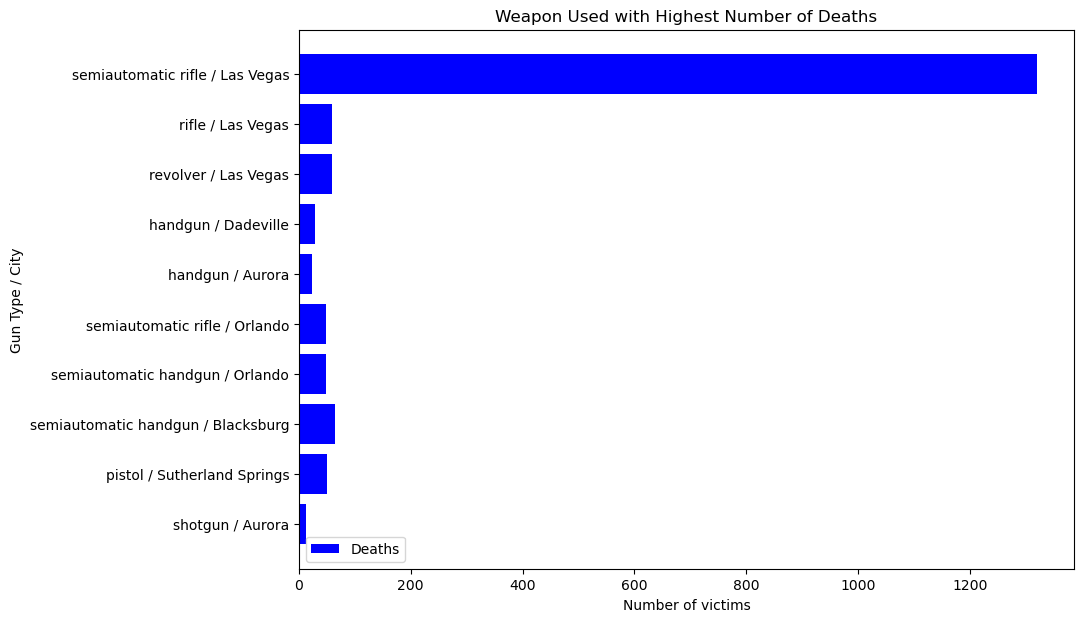

<Figure size 640x480 with 0 Axes>

In [85]:
# Plot the data
grouped_weapons = victims_df.groupby(["Type of Gun", "City"]).agg({"Deaths": "sum", "Injuries": "sum"}).reset_index()

grouped_weapons["Total Victims"] = grouped_weapons["Deaths"] + grouped_weapons["Injuries"]

cleaned_weapons_df = grouped_weapons.sort_values("Total Victims", ascending=False)

top_entries = sorted_df.head(10)

fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(top_entries["Type of Gun"] + " / " + top_entries["City"], top_entries["Deaths"], color="Blue", label="Deaths")
ax.set_xlabel("Number of victims")
ax.set_ylabel("Gun Type / City")
ax.set_title("Weapon Used with Highest Number of Deaths")
ax.invert_yaxis() 
ax.legend()

plt.show()
plt.savefig("top_weap_used.png")
